<a href="https://colab.research.google.com/github/Prince0813/Price-Prediction-of-used-Automobiles/blob/main/Price_Prediction_of_Used_Automobiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UPLOADING DATASET**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cars_dataset.csv to cars_dataset.csv


In [3]:
df = pd.read_csv("cars_dataset.csv")
print(df)

         model  year  price transmission  Distance fuelType  tax   mpg  \
0           A1  2017  12500       Manual     15735   Petrol  150  55.4   
1           A6  2016  16500    Automatic     36203   Diesel   20  64.2   
2           A1  2016  11000       Manual     29946   Petrol   30  55.4   
3           A4  2017  16800    Automatic     25952   Diesel  145  67.3   
4           A3  2019  17300       Manual      1998   Petrol  145  49.6   
...        ...   ...    ...          ...       ...      ...  ...   ...   
72430      I30  2016   8680       Manual     25906   Diesel    0  78.4   
72431      I40  2015   7830       Manual     59508   Diesel   30  65.7   
72432      I10  2017   6830       Manual     13810   Petrol   20  60.1   
72433   Tucson  2018  13994       Manual     23313   Petrol  145  44.8   
72434   Tucson  2016  15999    Automatic     11472   Diesel  125  57.6   

       engineSize     Make  
0             1.4     audi  
1             2.0     audi  
2             1.4     au

**DATA TRANSFORMATION**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   Distance      72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  int64  
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 5.5+ MB


In [5]:
df.head()

,model,year,price,transmission,Distance,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi


In [6]:
df.describe()

,year,price,Distance,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


In [7]:
df.shape

(72435, 10)

In [8]:
df['Distance'].value_counts()

5000     614
10       549
6000     433
1000     396
3000     330
        ... 
21797      1
55923      1
54269      1
52902      1
11472      1
Name: Distance, Length: 35743, dtype: int64

In [9]:
df['Make'].value_counts()

Ford       17964
vw         15157
BMW        10781
audi       10668
toyota      6738
skoda       6267
Hyundai     4860
Name: Make, dtype: int64

In [10]:
Make = {'Ford': 1, 'vw': 2, 'BMW': 3, 'audi': 4, 'toyota': 5, 'skoda': 6, 'Hyundai': 7}
Make.items()
df.Make = [Make[item] for item in df.Make]
df.head(5)

,model,year,price,transmission,Distance,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,4
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,4
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,4


In [11]:
# Looking ate the unique values of Categorical Features
print(df['engineSize'].unique())
print(df['transmission'].unique())
print(df['year'].unique())
print(df['model'].unique())

[1.4 2.  1.  3.  1.6 1.8 1.5 4.  2.5 1.2 4.2 2.9 5.2 1.9 2.7 0.  3.2 4.1
 6.3 0.6 4.4 2.2 5.  6.6 2.8 3.5 1.1 2.3 1.3 1.7 2.4 4.5]
['Manual' 'Automatic' 'Semi-Auto' 'Other']
[2017 2016 2019 2015 2014 2018 2013 2020 2004 2009 2012 2010 2007 2011
 2008 2003 2005 2002 2006 1998 1997 2001 2000 1999 1996]
[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7' ' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series'
 ' 2 Series' ' 4 Series' ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4'
 ' X2' ' X6' ' 8 Series' ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3'
 ' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' ' T-Roc'
 ' Golf' ' Passat' ' T-Cross' ' Polo' ' Tiguan' ' Sharan' ' U

In [12]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
Distance        0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [13]:
import pandas as pd

# Assuming you have loaded your DataFrame 'df' from somewhere
print("Shape of df Before dropping any Row: ", df.shape)

# Drop rows with NULL values in 'fuel' column
df = df[df['mpg'].notna()]
print("Shape of df After dropping Rows with NULL values in Miles per gallon: ", df.shape)

# Drop rows with NULL values in 'Drive' column
df = df[df['engineSize'].notna()]
print("Shape of df After dropping Rows with NULL values in EngineSize: ", df.shape)

# Drop rows with NULL values in 'Type' column
df = df[df['year'].notna()]
print("Shape of df After dropping Rows with NULL values in year: ", df.shape)

# Drop rows with NULL values in 'Distance' column
df = df[df['Distance'].notna()]
print("Shape of df After dropping Rows with NULL values in Distance: ", df.shape)


Shape of df Before dropping any Row:  (72435, 10)
Shape of df After dropping Rows with NULL values in Miles per gallon:  (72435, 10)
Shape of df After dropping Rows with NULL values in EngineSize:  (72435, 10)
Shape of df After dropping Rows with NULL values in year:  (72435, 10)
Shape of df After dropping Rows with NULL values in Distance:  (72435, 10)


In [14]:
df= df.reset_index(drop=True)

In [15]:
df['price'].describe()

count     72435.000000
mean      16580.158708
std        9299.028754
min         495.000000
25%       10175.000000
50%       14495.000000
75%       20361.000000
max      145000.000000
Name: price, dtype: float64

**Data Preprocessing**

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Handle missing values
df.fillna(0, inplace=True)  # Replace missing values with 0 or use more advanced methods

# Convert categorical variables using label encoding
label_encoder = LabelEncoder()
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['model_encoded'] = label_encoder.fit_transform(df['model'])

# Drop original categorical columns
df.drop(['transmission', 'model'], axis=1, inplace=True)

# Display the preprocessed data
print(df.head())

   year  price  Distance fuelType  tax   mpg  engineSize  Make  model_encoded
0  2017  12500     15735   Petrol  150  55.4         1.4     4              8
1  2016  16500     36203   Diesel   20  64.2         2.0     4             13
2  2016  11000     29946   Petrol   30  55.4         1.4     4              8
3  2017  16800     25952   Diesel  145  67.3         2.0     4             11
4  2019  17300      1998   Petrol  145  49.6         1.0     4             10


**Exploratory Data Analysis (EDA)**

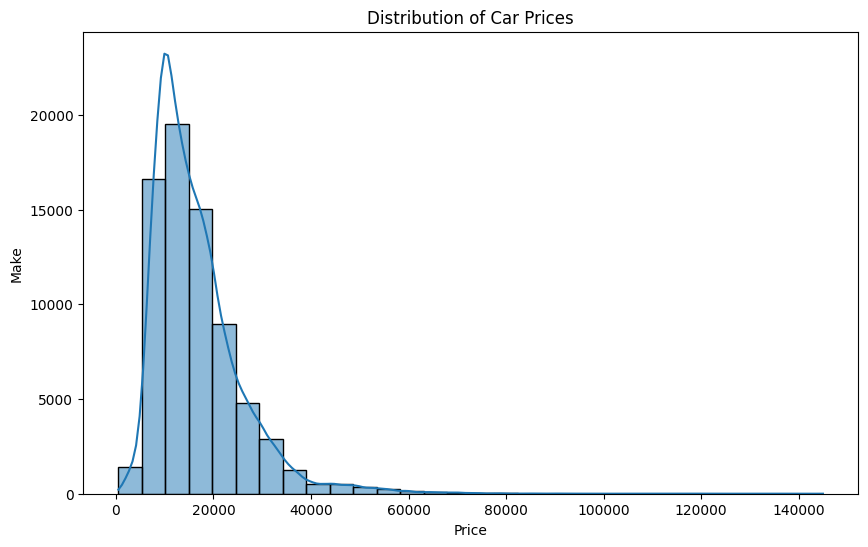

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Make')
plt.show()

<ipython-input-18-1d3b7424d029>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


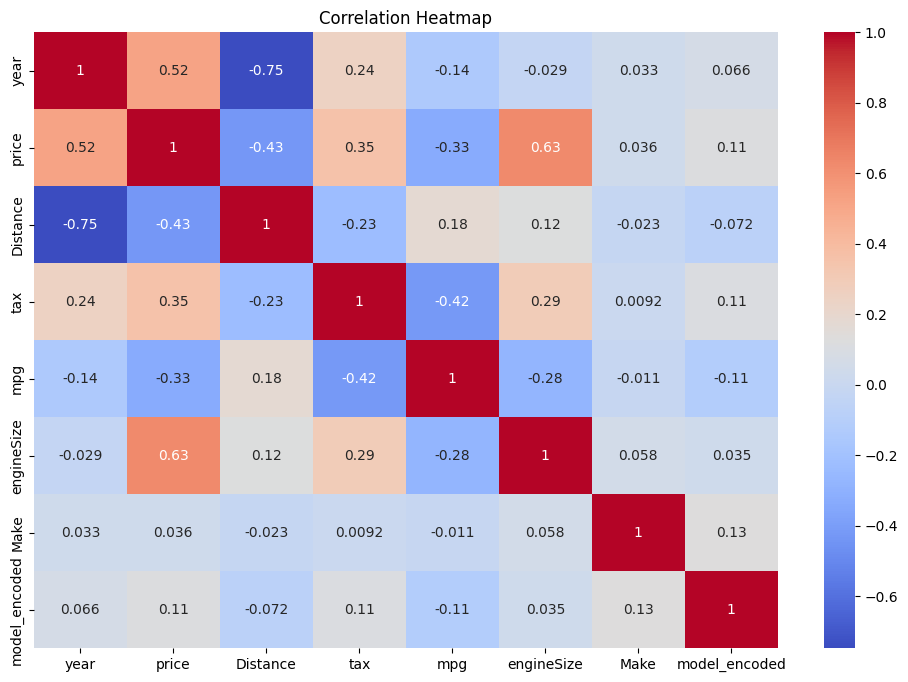

In [18]:
# Explore correlations using a heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Feature Engineering**

In [19]:
import datetime

# Calculate car age
current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['year']

# Calculate average distance traveled per year
df['avg_distance_per_year'] = df['mpg'] / df['car_age']
df['car_age'] = df['car_age'].astype(float)
df['avg_distance_per_year'] = df['avg_distance_per_year'].astype(float)

# Display the engineered features
print(df.head())

   year  price  Distance fuelType  tax   mpg  engineSize  Make  model_encoded  \
0  2017  12500     15735   Petrol  150  55.4         1.4     4              8   
1  2016  16500     36203   Diesel   20  64.2         2.0     4             13   
2  2016  11000     29946   Petrol   30  55.4         1.4     4              8   
3  2017  16800     25952   Diesel  145  67.3         2.0     4             11   
4  2019  17300      1998   Petrol  145  49.6         1.0     4             10   

   car_age  avg_distance_per_year  
0      6.0               9.233333  
1      7.0               9.171429  
2      7.0               7.914286  
3      6.0              11.216667  
4      4.0              12.400000  


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   72435 non-null  int64  
 1   price                  72435 non-null  int64  
 2   Distance               72435 non-null  int64  
 3   fuelType               72435 non-null  object 
 4   tax                    72435 non-null  int64  
 5   mpg                    72435 non-null  float64
 6   engineSize             72435 non-null  float64
 7   Make                   72435 non-null  int64  
 8   model_encoded          72435 non-null  int64  
 9   car_age                72435 non-null  float64
 10  avg_distance_per_year  72435 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 6.1+ MB


**Model Selection & Model Training**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define features and target
features = ['Make','model_encoded', 'year', 'mpg', 'engineSize', 'car_age', 'avg_distance_per_year']
target = 'price'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor()

# Train models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)


RandomForestRegressor()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using trained models
linear_predictions = linear_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate models
linear_mse = mean_squared_error(y_test, linear_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)

linear_r2 = r2_score(y_test, linear_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

print(f"Linear Regression - MSE: {linear_mse}, R-squared: {linear_r2}")
print(f"Random Forest - MSE: {random_forest_mse}, R-squared: {random_forest_r2}")


Linear Regression - MSE: 26824996.50783461, R-squared: 0.6973822687322364
Random Forest - MSE: 4511369.394024713, R-squared: 0.9491064101152128
